In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import time
from sklearn.linear_model import LinearRegression
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
start = time.time()
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80026ba215c9965e6260663fff8da556


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [5]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | emerald
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | mayo
Processing Record 8 of Set 1 | akyab
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | udachnyy
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | barcelos
Processing Record 16 of Set 1 | porto novo
Processing Record 17 of Set 1 | hami
Processing Record 18 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | marcona
City not found. Skippi

Processing Record 37 of Set 4 | fairbanks
Processing Record 38 of Set 4 | makakilo city
Processing Record 39 of Set 4 | kaeo
Processing Record 40 of Set 4 | raduzhnyy
Processing Record 41 of Set 4 | richards bay
Processing Record 42 of Set 4 | qui nhon
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | gazanjyk
Processing Record 45 of Set 4 | culpeper
Processing Record 46 of Set 4 | labutta
City not found. Skipping...
Processing Record 47 of Set 4 | buraydah
Processing Record 48 of Set 4 | payakumbuh
Processing Record 49 of Set 4 | aliaga
Processing Record 50 of Set 4 | butaritari
Processing Record 1 of Set 5 | progreso
Processing Record 2 of Set 5 | iqaluit
Processing Record 3 of Set 5 | karaul
City not found. Skipping...
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | yulara
Processing Record 6 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 5 | westport
Processing Record 8 of Set 5 | vilela
Processing Recor

Processing Record 26 of Set 8 | cam pha
City not found. Skipping...
Processing Record 27 of Set 8 | san fernando
Processing Record 28 of Set 8 | pangnirtung
Processing Record 29 of Set 8 | miraflores
Processing Record 30 of Set 8 | toliary
City not found. Skipping...
Processing Record 31 of Set 8 | avera
Processing Record 32 of Set 8 | srednekolymsk
Processing Record 33 of Set 8 | boffa
Processing Record 34 of Set 8 | rawson
Processing Record 35 of Set 8 | cesvaine
Processing Record 36 of Set 8 | vilyuysk
Processing Record 37 of Set 8 | mandurah
Processing Record 38 of Set 8 | immokalee
Processing Record 39 of Set 8 | pacific grove
Processing Record 40 of Set 8 | merauke
Processing Record 41 of Set 8 | karamea
City not found. Skipping...
Processing Record 42 of Set 8 | camacha
Processing Record 43 of Set 8 | lavrentiya
Processing Record 44 of Set 8 | morondava
Processing Record 45 of Set 8 | cockburn town
Processing Record 46 of Set 8 | olafsvik
Processing Record 47 of Set 8 | aklavik


Processing Record 10 of Set 12 | hobyo
Processing Record 11 of Set 12 | mahajanga
Processing Record 12 of Set 12 | mahibadhoo
Processing Record 13 of Set 12 | kangaatsiaq
Processing Record 14 of Set 12 | lantawan
Processing Record 15 of Set 12 | nemuro
Processing Record 16 of Set 12 | sterling
Processing Record 17 of Set 12 | mijas
Processing Record 18 of Set 12 | kannangad
Processing Record 19 of Set 12 | ewa beach
Processing Record 20 of Set 12 | qaqortoq
Processing Record 21 of Set 12 | ksenyevka
City not found. Skipping...
Processing Record 22 of Set 12 | tortosa
Processing Record 23 of Set 12 | doembang nangbuat
Processing Record 24 of Set 12 | shagonar
Processing Record 25 of Set 12 | baturaja
Processing Record 26 of Set 12 | mugumu
Processing Record 27 of Set 12 | college
Processing Record 28 of Set 12 | moussoro
Processing Record 29 of Set 12 | saint-paul
Processing Record 30 of Set 12 | krasnoarmeysk
Processing Record 31 of Set 12 | dakar
Processing Record 32 of Set 12 | ambod

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame and reorder the columns.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Codrington,AU,2022-04-07 16:29:08,-38.2667,141.9667,55.96,92,0,9.10
1,Rikitea,PF,2022-04-07 16:31:47,-23.1203,-134.9692,79.68,63,7,14.14
2,Vaini,TO,2022-04-07 16:31:47,-21.2000,-175.2000,77.16,94,75,2.30
3,Emerald,AU,2022-04-07 16:27:21,-23.5333,148.1667,71.35,83,26,5.75
4,Chuy,UY,2022-04-07 16:31:48,-33.6971,-53.4616,76.46,42,100,4.63
5,Mayo,US,2022-04-07 16:31:48,38.8876,-76.5119,55.51,95,100,4.61
6,Akyab,MM,2022-04-07 16:27:33,20.1500,92.9000,80.38,78,81,6.35
7,Guerrero Negro,MX,2022-04-07 16:31:48,27.9769,-114.0611,75.58,39,0,4.29
8,East London,ZA,2022-04-07 16:31:16,-33.0153,27.9116,61.74,72,0,16.11
9,Castro,BR,2022-04-07 16:31:49,-24.7911,-50.0119,73.24,72,99,2.86


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [9]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/07/22'

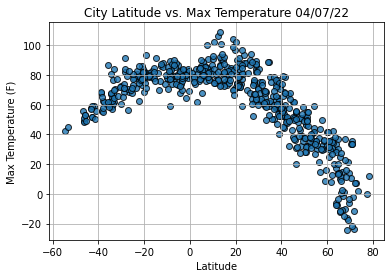

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


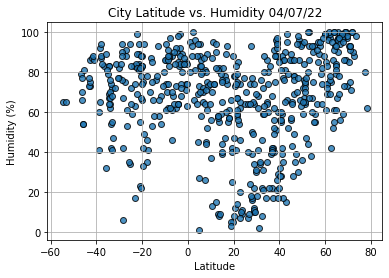

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

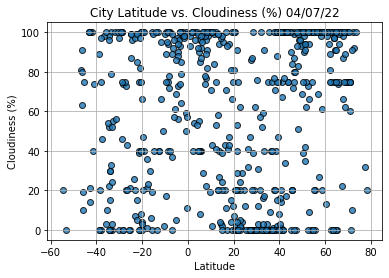

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

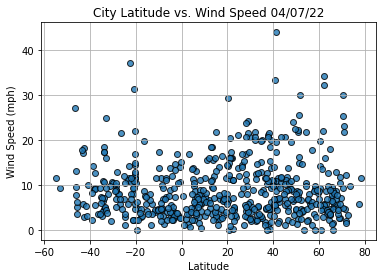

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Display total computational time.
end = time.time()
total_time = end - start
print(f"Total time elapsed = {total_time / 60 :.2f} minutes")

Total time elapsed = 3.61 minutes
